# Step 1: Import Libraries

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# Step 2: Load and Prepare the Data

In [19]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Model

In [20]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Step 4: Train the Model

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 0s 4ms/sample - loss: 0.9946 - accuracy: 0.6771 - val_loss: 0.9663 - val_accuracy: 0.5000
Epoch 2/50
 8/96 [=>............................] - ETA: 0s - loss: 0.9434 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


96/96 [==============================] - 0s 885us/sample - loss: 0.7765 - accuracy: 0.7500 - val_loss: 0.7733 - val_accuracy: 0.7500
Epoch 3/50
96/96 [==============================] - 0s 833us/sample - loss: 0.6276 - accuracy: 0.8229 - val_loss: 0.6381 - val_accuracy: 0.8750
Epoch 4/50
96/96 [==============================] - 0s 679us/sample - loss: 0.5249 - accuracy: 0.8333 - val_loss: 0.5347 - val_accuracy: 0.8750
Epoch 5/50
96/96 [==============================] - 0s 946us/sample - loss: 0.4547 - accuracy: 0.8021 - val_loss: 0.4573 - val_accuracy: 0.8750
Epoch 6/50
96/96 [==============================] - 0s 802us/sample - loss: 0.4016 - accuracy: 0.8229 - val_loss: 0.4211 - val_accuracy: 0.9167
Epoch 7/50
96/96 [==============================] - 0s 635us/sample - loss: 0.3657 - accuracy: 0.8229 - val_loss: 0.3734 - val_accuracy: 0.9167
Epoch 8/50
96/96 [==============================] - 0s 605us/sample - loss: 0.3361 - accuracy: 0.8333 - val_loss: 0.3476 - val_accuracy: 0.9167
Epo

# Step 5: Evaluate the Model

In [22]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 1.0000


# Step 6: Make Predictions

In [23]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# Step 7: Visualize Training History

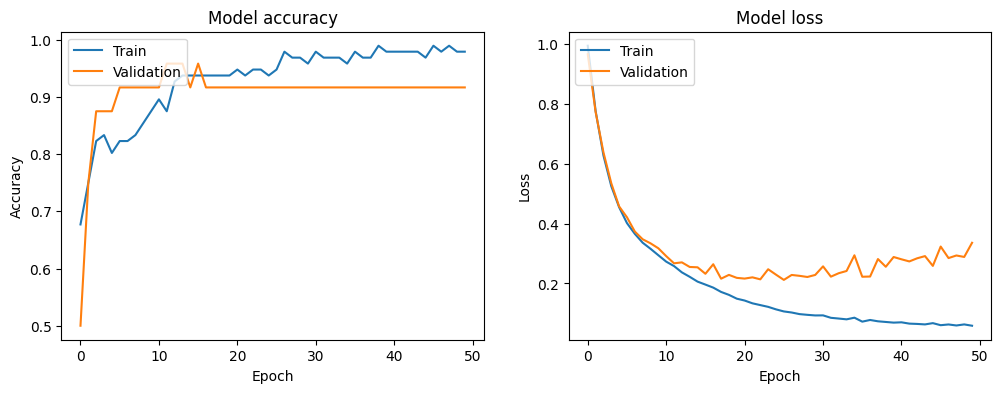

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
